In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('googleplaystore_user_reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [2]:
#Atribuir as medias às variáveis aleatórias quantitativas que possuem o NaN
Sentiment_Polarity = df['Sentiment_Polarity'].copy()
Sentiment_Subjectivity = df['Sentiment_Subjectivity'].copy()
Sentiment_Polarity[Sentiment_Polarity.isna() == True] = df['Sentiment_Polarity'].mean()
Sentiment_Subjectivity[Sentiment_Subjectivity.isna() == True] = df['Sentiment_Subjectivity'].mean()
df['Sentiment_Polarity']= Sentiment_Polarity
df['Sentiment_Subjectivity']= Sentiment_Subjectivity
#df[df['Sentiment_Subjectivity'].isna() == True] = df['Sentiment_Subjectivity'].mean()
#newDF = pd.DataFrame({'App': df['App'], 'Translated_Review' : df['Translated_Review'], 'Sentiment' : df['Sentiment'], })
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,0.182146,0.492704
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,0.182146,0.492704
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [3]:
#Retirar os valores duplicados
df = df[df.duplicated() == False]
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,0.182146,0.492704
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000


In [4]:
#Tirar os valores NaN
df = df[df['App'].isna() == False]
df = df[df['Translated_Review'].isna() == False]
df = df[df['Sentiment'].isna() == False]
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [5]:
df.to_csv('googleplaystore_user_reviews_cleaned.csv', sep=',', index=False)
t = pd.read_csv('googleplaystore_user_reviews_cleaned.csv')
t.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


Text(0,0.5,'Sentiment_Subjectivity')

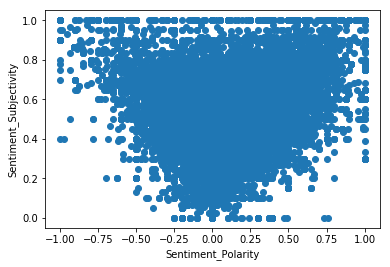

In [8]:
plt.plot(df['Sentiment_Polarity'], df['Sentiment_Subjectivity'], 'o');
plt.xlabel('Sentiment_Polarity')
plt.ylabel('Sentiment_Subjectivity')